In [1]:
import sequences_creator
import sequences_creator.plotters as plotters
import random

# Sequences With Gaps Dataset

The *Sequences With Gaps* dataset contains sequences of numbers of variable length, within each of these sequences is a variable amount of gaps. Let's take a look at a few of these sequences.

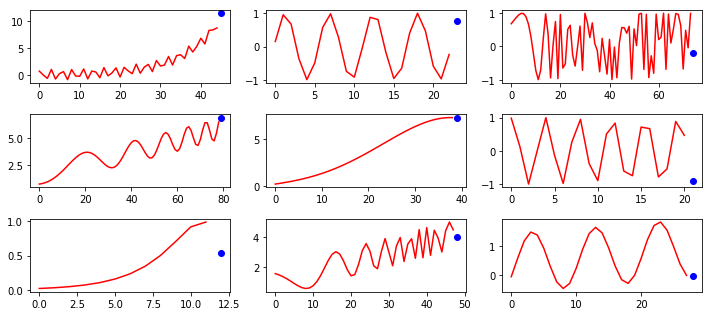

In [2]:
dataset = sequences_creator.create_dataset(set_size=100, length_range=(10, 100))
random_samples = random.sample((dataset), 9)
plotters.plot_records(random_samples)

## Usage of the dataset creator

The easiest way to create a dataset is

In [3]:
dataset = sequences_creator.create_dataset()

But there are a few parameters you can use to customize your dataset.

### `set_size`

Use the `set_size` parameter to chose the cardinality of the new dataset.

In [4]:
dataset = sequences_creator.create_dataset(set_size=100)
len(dataset)

100

### `length_range`

The sequences will have random lengths. Use the `length_range` to specify the range.

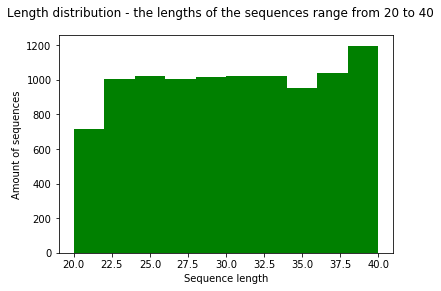

In [5]:
dataset = sequences_creator.create_dataset(length_range=(20, 40))
plotters.plot_length_distribution(dataset)

*TODO: Actually it is intended that the lengths are distributed equally, but, as we can see, there are less sequences with a length within 20 and 22, and more within 38 and 40.*

## Format of the dataset

The dataset comes as a `list` containing an amount of `set_size` sequences with gaps.

In [6]:
dataset = sequences_creator.create_dataset(set_size=10)
sample = dataset[4]

Each element in the dataset is a tuple `(x, y)`, where `x` and `y` both are `torch.FloatTensor`s.

In [7]:
x, y = sample

### The structure of x

In [8]:
x.shape

(62,)

Component `x` contains the values of the sequence in the first row and the information whether the value is known or not in the second. The 2 occuring values in the 2nd row are `1` for "known value"/"no gap" and `0` for "unknown value"/"gap". In case of "gap" the corresponding value in the first row is `0` as well and doesn't have a meaning.

In [9]:
x[:4]

array([0.19360017, 0.2884582 , 0.38228428, 0.47424757])

### The structure of y

In [10]:
y.shape

(1,)

`y` contains the values that belong into the gaps in `x`, hence contains as much values as there are gaps in `x` (in other words as there are `0`s in `x[1]`).